In [301]:
import os
import sys
import math
import time
import statistics
from datetime import datetime, timedelta
from dateutil import rrule
# import dateutil.relativedelta
import pandas as pd
# import modin.pandas as pd
# os.environ["MODIN_ENGINE"] = "dask" 
import numpy as np
from dask import dataframe as dd
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots as subplots
import matplotlib.pyplot as plt
# import scipy.fftpack
# from scipy.signal import find_peaks
# import talib
import pytz
import MetaTrader5 as mt5
# import random

from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure as bokeh_figure
from bokeh.models.annotations import Span as bokeh_span
from bokeh.models import HoverTool as  bokeh_hovertool
from bokeh.models import ColumnDataSource as bokeh_ColumnDataSource
from bokeh.layouts import column

Loading BokehJS ...

In [606]:
################ MAIN ###################### 

### Settings ------------------------------

# symbols = ['GBPUSD','EURGBP','GBPAUD','GBPCAD','GBPJPY','GBPCHF','EURUSD','EURAUD','EURCAD','EURJPY','EURCHF','AUDUSD','USDCAD','USDJPY','USDCHF', 'AUDCAD', 'AUDJPY', 'AUDCHF', 'CADJPY', 'CADCHF', 'CHFJPY']
# symbols = ['GBPUSD_SB','EURGBP_SB','EURUSD','AUDUSD','USDCAD','USDCHF', 'XAUGBP_SB','XAUEUR_SB']
# symbols = ['GBPUSD','EURUSD','AUDUSD','USDCAD','USDCHF','USDJPY','EURGBP','XAUUSD','XAUEUR','XAGUSD','XTIUSD','XBRUSD','US2000','NAS100']
# symbols = ['GBPUSD','EURUSD','AUDUSD','USDCAD','USDCHF','USDJPY','EURGBP']
# symbols = ['GBPUSD']
symbol = 'NAS100_SB'

lot_size = 1000
tick_size =0.1
resample_rate='1s'

timezone = pytz.timezone("Etc/UTC")
utc_from = datetime(2021, 5, 19, tzinfo=timezone) #  1/29  1/11  1/19  3/15 3/11 1/8 1/13 1/22 1/7 1/12 gbp2/25
utc_to = datetime(2021, 5, 19, tzinfo=timezone)
now = datetime.now(tz=timezone)
fridayclose = datetime(2000,1,1, 20, 0, 0, 0, tzinfo=timezone)
endofdayclose = datetime(2000,1,1, 20, 0, 0, 0, tzinfo=timezone)
swapclose = datetime(2000,1,1, 23, 58, 0, 0, tzinfo=timezone)
tradebegin = datetime(2000,1,1, 1, 5, 0, 0, tzinfo=timezone)

### -----------------------------------------
### Main functions

results = pd.DataFrame()
then=datetime.now()
# for symbol in symbols :

for day_from in rrule.rrule(rrule.DAILY, dtstart=utc_from, until=utc_to):
    day_to= day_from + timedelta(days=1)
    
    get_data(symbol, day_from, day_to, now, timezone)
#     get_data(symbol, day_from + timedelta(hours=16,minutes=30), day_to - timedelta(hours=6,minutes=0), now, timezone)
    if not inst.empty :
        r2 = M_factor (inst, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_size, False)
        r2=[symbol,'factor'] + r2
        results= results.append(pd.DataFrame(r2).T)
    

results.columns= ['Symbol','Method','Trades','Wins %','Loses %','Mean Max Pts','Mean Min Pts','Max Pts','Min Pts','Drawdown','Profit Factor','Full Profit Factor','Total Spread', 'Total Points', 'Gross Points', 'Gross Profit £','All Possible £']
results =results.reset_index(drop=True)
now=datetime.now()
print(now-then)

# to do:
#     seperate directional speed
#     straight line formula
#     patterns high, dip percentage

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33
<--connected-->
-- NAS100_SB  Ticks received: 214650 From:  2021-05-19 00:00:00+00:00 To:  2021-05-20 00:00:00+00:00
<--disconnected-->


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:294: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:314: RuntimeWarning: divide by zero encountered in double_scalars


Gross profit: £-0.84
0:00:01.037641


In [581]:
results.sort_values(by='Gross Profit £', ascending=False)

Symbol  Method Trades Wins % Loses % Mean Max Pts Mean Min Pts Max Pts  \
0  NAS100_SB  factor      2    NaN     100          NaN         -1.4       0   

  Min Pts Drawdown Profit Factor Full Profit Factor Total Spread Total Points  \
0    -2.4     -1.8             0                  0            2         -2.8   

  Gross Points Gross Profit £ All Possible £  
0         -4.8          -0.21          -0.21

In [ ]:
pd.set_option('display.max_rows', 500)
# results
results.sort_values(by='Gross Profit £', ascending=False)
# results[['Method','Trades','Wins %','Gross Points', 'Gross Profit £']].groupby(by='Method').sum().sort_values(by='Gross Profit £', ascending=False)

In [291]:
pd.set_option('display.max_rows', 500)
# results.sort_values(by='Gross Profit £', ascending=False)
# results[['Symbol', 'Gross Profit £']].groupby(by='Symbol').sum()
# results['Mean Max Pts'].mean()
# results['Mean Min Pts'].mean()
# results['Max Pts'].max()
# results['Min Pts'].min()
# results['Drawdown'].mean()
# results['Drawdown'].min()
results[['Profit Factor','Full Profit Factor']].mean()
# results['Wins %'].fillna(0).sum() / (results['Wins %'].fillna(0).sum() + results['Loses %'].fillna(0).sum()) * 100
# results['Loses %'].fillna(0).sum() / (results['Wins %'].fillna(0).sum() + results['Loses %'].fillna(0).sum()) * 100
# results[['Method','Trades','Wins %','Gross Points', 'Gross Profit £']].groupby(by='Method').sum().sort_values(by='Gross Profit £', ascending=False)
# results.loc[results['Method']==0.00050].sort_values(by='Gross Profit £', ascending=False)

Profit Factor         0.784419
Full Profit Factor    0.557677
dtype: float64

In [ ]:
#########

In [607]:
# Bokeh

hover= bokeh_hovertool(
    tooltips=[("index", "@index"),('datetime','@datetime{%Y-%m-%d %H:%M:%S.%3Nms}'),('bid','@bid{%0.2f}'),('ask','@ask{%0.2f}'),('spread','@spread'),],
    formatters={'@datetime':'datetime','@bid':'printf','@ask':'printf',},mode='vline')

hover2 = bokeh_hovertool(tooltips=[("X", "@x"),("Y", "@y{0.0000f}"),],mode='vline')

tools_to_show = 'wheel_zoom,yzoom_out,xzoom_out,yzoom_in,xzoom_in,box_zoom,crosshair,reset,pan'
p1 = bokeh_figure(plot_height =300, plot_width = 900, toolbar_location='above', tools=tools_to_show)
source = bokeh_ColumnDataSource(inst)
p1.line('index', "bid", source=source, name='bid',line_alpha=0.5)
# p1.line(inst.index, close_chart,  name='close', line_color='gold')
# p1.line('index', "ask", source=source, name='ask', line_color='red',line_alpha=0.5)
# p1.line(inst.index, np.nan_to_num(renko_chart), name='renko', line_color='orange')
# p1.line(inst.index, p1_chart,  name='jma +', line_color='green')
# p1.line(inst.index, jma_0_plus_chart,  name='jma +', line_color='green')
# p1.line(inst.index, jma_0_minus_chart,  name='jma -', line_color='red')
# p1.line(inst.index, jma_3_plus_chart,  name='jma 3+', line_color='limegreen')
# p1.line(inst.index, jma_3_minus_chart,  name='jma 3-', line_color='orange')
# p1.line(inst.index, inst['bid'].to_numpy()-(np.array(pct_change_chart)*100), line_color='red')
p1.line(inst.index, np.nan_to_num(p2_chart), name='p2')
p1.add_tools(hover)
for b in bought :
    p1.add_layout(bokeh_span(location=b,dimension='height', line_color='green',line_width=1))
for s in sold :
    p1.add_layout(bokeh_span(location=s,dimension='height', line_color='red',line_width=1))
for c in closed :
    p1.add_layout(bokeh_span(location=c,dimension='height', line_color='yellow',line_width=1))

p2 = bokeh_figure(plot_height =300, plot_width = 900, toolbar_location='above', tools=tools_to_show, x_range=p1.x_range)
# p2.line(inst.index, np.nan_to_num(renko_time_chart), name='bid')
# p2.line('index', "spread", source=source, name='bid')
# p2.line(inst.index, jma_1_plus_chart,  name='jma +', line_color='green')
# p2.line(inst.index, jma_1_minus_chart,  name='jma -', line_color='red')
# p2.line(inst.index, np.nan_to_num(pct_change_chart), name='bid')
p2.line(inst.index, np.nan_to_num(dip_pct_chart), name='dip long')

p2.add_tools(hover2)
p2.add_layout(bokeh_span(location=0,dimension='width', line_color='yellow',line_width=1))


p3 = bokeh_figure(plot_height =300, plot_width = 900, toolbar_location='above', tools=tools_to_show, x_range=p1.x_range)
p3.line(inst.index, np.nan_to_num(curve_chart), name='curve')
p3.line(inst.index, jma_1_plus_chart,  name='jma +', line_color='green')
p3.line(inst.index, jma_1_minus_chart,  name='jma -', line_color='red')
# p3.line(inst.index, jma_0_plus_chart,  name='jma +', line_color='green')
# p3.line(inst.index, jma_0_minus_chart,  name='jma -', line_color='red')
p3.add_layout(bokeh_span(location=1,dimension='width', line_color='yellow',line_width=1))
p3.add_layout(bokeh_span(location=2,dimension='width', line_color='yellow',line_width=1))
p3.add_layout(bokeh_span(location=-1,dimension='width', line_color='yellow',line_width=1))
p3.add_layout(bokeh_span(location=-2,dimension='width', line_color='yellow',line_width=1))

show(column(p1,p2,p3))

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\plotting\helpers.py:689: UserWarning: ZoomInTool,ZoomOutTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))


In [ ]:
#######

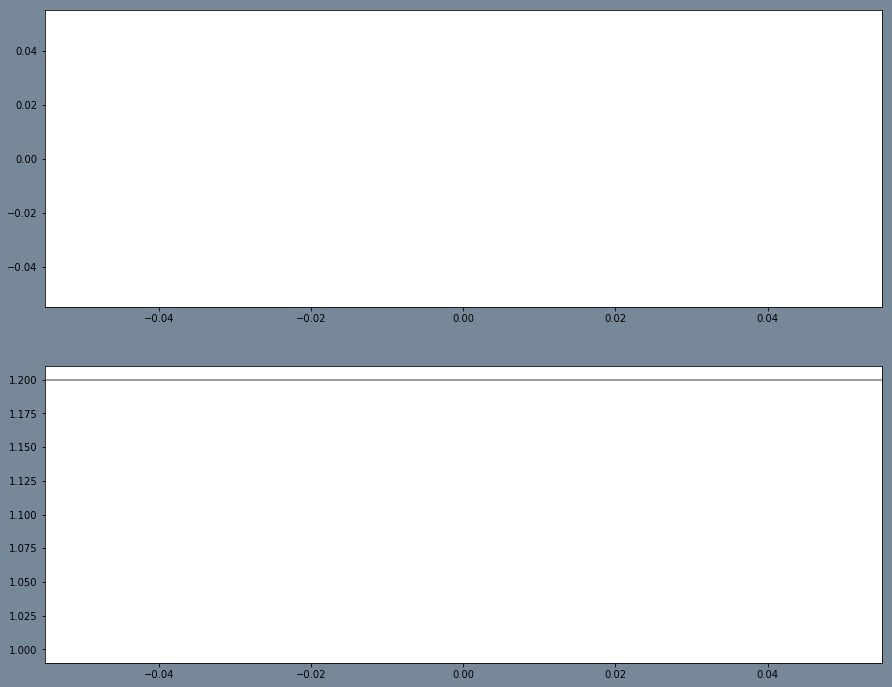

In [603]:
#Matplotlib

f = plt.figure(facecolor='LightSlateGray')
f.set_figwidth(15)
f.set_figheight(12)

num_rows= 2

#plot 1:
plt.subplot(num_rows, 1, 1)
# plt.plot(inst.index.to_numpy(),inst['bid'].to_numpy(), alpha=0.5)
plt.plot(inst.index.to_numpy(),inst['bid'].to_numpy()-(np.array(pct_change_chart)*1000), alpha=0.5)
# plt.plot(inst.index.to_numpy(), speed_chart)
# plt.plot(inst.index.to_numpy(), p3_chart)
# plt.plot(inst.index.to_numpy(), np.array(p1_chart))
# plt.plot(inst.index.to_numpy(),jma_1_minus_chart,color = 'red')
# plt.plot(inst.index.to_numpy(),jma_1_plus_chart,color = 'green')
# plt.plot(inst.index.to_numpy(),jma_2_minus_chart,color = 'orange')
# plt.plot(inst.index.to_numpy(),jma_2_plus_chart,color = 'limegreen')
# plt.plot(inst.index.to_numpy(), p1_chart,color='black')
# plt.plot(inst.index.to_numpy(),jma_2_neut_chart,color = 'grey')
# plt.plot(inst.index.to_numpy(),jma_3_minus_chart,color = 'red')
# plt.plot(inst.index.to_numpy(),jma_3_plus_chart,color = 'green')
# plt.plot(inst.index.to_numpy(), speed_renko_chart)
# plt.axhline(y = 0, color = 'b', linestyle = '-')
# for b in bought :
#     plt.axvline(x = b, color = 'g',linewidth= 1.5)
# for s in sold :
#     plt.axvline(x = s, color = 'r',linewidth= 1.5)
# for c in closed :
#     plt.axvline(x = c, color = 'b',linewidth= 1)


# plot 2:
plt.subplot(num_rows, 1, 2)
# plt.plot(inst.index.to_numpy(), curve_chart)
plt.plot(inst.index.to_numpy(), profit_factor_chart)
# plt.plot(inst.index.to_numpy(), profit_factor_all_chart)
plt.axhline(y = 1.2, color = 'grey', linestyle = '-')

plt.show()

In [ ]:
####

In [593]:
# with profit factor!!

def M_factor (frame, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_size, print_txt) :
    global bought, sold, closed
    global renko_chart
    global jma_1_minus_chart,jma_1_plus_chart,jma_2_minus_chart,jma_2_plus_chart,jma_3_minus_chart,jma_3_plus_chart
    global jma_0_minus_chart, jma_0_plus_chart
    global p1_chart, p2_chart, p3_chart
#     global jma_chart, jma_2_chart, jma_3_chart
    global macd_jma_chart, macd_chart
    global jma_minus_2_pct_chart, jma_plus_2_pct_chart, jma_neut_2_pct_chart
    global jma_2_neut_chart, jma_1_neut_chart
    global speed_chart, speed_jma_chart
    global ROC_plus_chart, ROC_minus_chart, ROC_2_plus_chart, ROC_2_minus_chart
    global profit_factor_chart,profit_factor_all_chart
    global pct_change_chart, close_chart, renko_time_chart,curve_chart, dip_pct_chart
    
    long_open = False
    short_open= False
    pos_open_price = np.nan
    total_profit=0
    no_trades=0
    min_profit=0
    max_profit=0
    min_profit_sum=0
    max_profit_sum=0
    profit=0
    loses=0
    wins=0
    profit_GBP = 0
    total_profit_GBP = 0
    total_spread = 0
    to_close=False
    drawdown = 0
    drawdown_time = np.nan
    drawdown_GBP = np.nan
    bought=[]
    sold=[]
    closed=[]
    soldlock=False
    boughtlock=False
    jma_1_prev=np.nan
    jma_1_plus=float('nan')
    jma_1_minus=float('nan')
    jma_1_minus_chart=[]
    jma_1_plus_chart=[]
    Filt0=np.nan
    Det0=np.nan
    Det1=np.nan
    jma_1=np.nan
    renko_chart=[]
    renko=0
    ind=-1
#     tick_sum=0
    tick_count=0
    renko_ind=-1
#     renko_mean=np.nan
#     renko_mean_chart=[]
    jma_2_prev=np.nan
    jma_2_plus=float('nan')
    jma_2_minus=float('nan')
    jma_2_minus_chart=[]
    jma_2_plus_chart=[]
    Filt0_2=np.nan
    Det0_2=np.nan
    Det1_2=np.nan
    jma_2=np.nan
    renko_up=0
    renko_down=0
    jma_3_prev=float('nan')
    jma_3_plus=float('nan')
    jma_3_minus=float('nan')
    jma_3_minus_chart=[]
    jma_3_plus_chart=[]
    Filt0_3=np.nan
    Det0_3=np.nan
    Det1_3=np.nan
    jma_3=np.nan
    Filt0_0=np.nan
    Det0_0=np.nan
    Det1_0=np.nan
    jma_0=np.nan
    jma_0_prev=np.nan
    jma_0_chart=[]
    jma_0_plus=float('nan')
    jma_0_minus=float('nan')
    jma_0_minus_chart=[]
    jma_0_plus_chart=[]
    p1_chart=[]
    p2_chart=[]
    p3_chart=[]
#     jma_3_chart=[]
#     jma_2_chart=[]
#     jma_1_chart=[]
    renko_prev=np.nan
    renko_sum=3  #3 default!
    renko_count=1
    macd=np.nan
    macd_chart=[]
#     macd_jma=np.nan
#     Filt0_macd=np.nan
#     Det0_macd=np.nan
#     Det1_macd=np.nan
#     macd_jma_chart=[]
    jma_minus_count=0
    jma_plus_count=0
#     jma_last=np.nan
#     jma_pct=np.nan
    jma_2_pct=0
    jma_minus_2_pct=0
    jma_plus_2_pct=0
    jma_neut_2_pct=0
    jma_minus_2_pct_chart=[]
    jma_plus_2_pct_chart=[]
    jma_neut_2_pct_chart=[]
#     jma_2_pct_jma=np.nan
#     Filt0_2_pct=np.nan
#     Det0_2_pct=np.nan
#     Det1_2_pct=np.nan
#     jma_2_pct_jma_chart=[]
    period_1=10
    jma_2_neut=np.nan
    jma_2_neut_chart=[]
    jma_3_neut=np.nan
    jma_1_neut=np.nan
    jma_1_neut_chart=[]
    period_2=150
    
    if (len(inst)>0) :
        last_dt=inst.to_numpy()[-1][2]
        first=inst['bid'][0]
        renko_3=first
    else:
        last_dt=np.nan
        first=np.nan
    
#     speed_list = [first_speed] * 10000
#     speed_chart=[]
#     speed=first_speed
#     speed_prev=first
#     speed_abs=first
#     speed_jma_chart=[]
#     speed_renko=0
#     speed_renko_2=0
#     open_speed=np.nan
#     mashed = np.nan
        
    max_trades=100
    profit_tres=False
#     pos_max_profit=0
#     profit_close=0.00020
    renko_size_00=0.00002 #3 5
    renko_size_0=0.00008 #9  8
    renko_size_1=0.00013 #15  13
    renko_size_2=0.00025
    renko_size_3=0.00035
    renko_size=1
    renko_2=0
    renko_2_prev=np.nan
#     renko_3=0
    renko_3_prev=np.nan
    
    jma_minus_count_sum=[]
    jma_plus_count_sum=[]
    
    ROC=np.nan
    ROC_prev=np.nan
    ROC_plus_chart=[]
    ROC_minus_chart=[]
    ROC_minus=0
    ROC_plus=0
    
    ROC_2=np.nan
    ROC_2_prev=np.nan
    ROC_2_plus_chart=[]
    ROC_2_minus_chart=[]
    ROC_2_minus=0
    ROC_2_plus=0
    
    offset_start=800
    profit_factor_chart=[]
    profit_factor=1
    profit_factor_all=0
    profit_factor_all_chart=[]
    max_profit_sum_all=0
    min_profit_sum_all=0
    wins_all=0
    loses_all=0
    no_trades_all=0
    total_profit_GBP_all=0
    
    def div(n, d):
        return n / d if d else 0
    
    resample_time=timedelta(seconds=1)
#     dt_next= (datetime.fromtimestamp(int(inst['datetime'][0])/1000)+resample_time).replace(microsecond=0)
    pct_change_chart=[]
    pct_change=np.nan
    close_prev=np.nan
    close=np.nan
    long_pct_reached=False
    long_open_pct_reached=False
    short_pct_reached=False
    short_open_pct_reached=False
    
#     close_1s=first
    close_chart=[]
    renko_time_chart=[]
    renko_time=inst['datetime'][0]
    renko_dt=inst['datetime'][0]
    
    RENKO_TIME_JMA_LIMIT=7000
    renko_time_long_limit=False
    renko_time_short_limit=False
    
    start_point=inst['bid'][0]
    curve=np.nan
    curve_chart=[]
    
    dip_pct_chart=[]
    dip_pct=np.nan
    dip_pct_prev=np.nan
    higher_high=0
    higher_low=inst['bid'][0]
    lower_low=inst['bid'][0]
    lower_high=0
    short=0
    
    lower_high_reach=False
    higher_low_reach=False
    
    jma_1_plus_count=0
    jma_1_minus_count=0
    jma_0_plus_count=0
    jma_0_minus_count=0
    gate_1=False
    gate_2=False
    gate_3=False

    for dt, bid, ask, spread in frame.to_numpy() :


        ind+=1
#         close_prev=close
        close=bid
#         spread= 0
#         volume+=1
#         tick_count+=1
#         tick_sum+=bid


#         dt_dt= datetime.fromtimestamp(int(dt)/1000)
#         if dt_dt> dt_next :
#             dt_next= (dt_dt+resample_time).replace(microsecond=0)
#             volume=0
#             plus_tick=0
#             minus_tick=0
#             close_1s=close
#             close_prev=close

#         pct_change=((close-close_prev)/close_prev) *100

#         jma_0_prev=jma_0
#         jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(bid, 2000, 10, 1, jma_0,Filt0_0,Det0_0,Det1_0)
    
    
    
    
        if close> lower_high :
            lower_high=close
            lower_high_reach=True
        
        if close < lower_low :
            if (lower_high > close) & (lower_high_reach==True) & (((lower_high-lower_low)/lower_low)*100 >0.02) :
                dip_pct_prev=dip_pct
                dip_pct= ((lower_high-lower_low)/lower_low)*100
#                 if (dip_pct_prev<0) :
#                     tick_count=0
#                     start_point=close
#                     curve=-1
                lower_high_reach=False
                higher_high=lower_high
                higher_low=close
#                 print('bear',ind)
            lower_low=close
            lower_high=close

            
        if close< higher_low :
            higher_low=close
            higher_low_reach=True
        
        if close > higher_high :
            if (higher_low < close) & (higher_low_reach==True) & (((higher_low-higher_high)/higher_high)*100 <-0.02)  :
                dip_pct_prev=dip_pct
                dip_pct= ((higher_low-higher_high)/higher_high)*100
#                 if (dip_pct_prev>0) :
#                     tick_count=0
#                     start_point=close
#                     curve=-1
                higher_low_reach=False
                lower_low=higher_low
                lower_high=close
#                 print('bull',ind)
            higher_high=close
            higher_low=close
            
            
        tick_count+=1
        curve=(abs(close-(start_point)) / tick_size ) / tick_count
        jma_0_prev=jma_0
        jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(close, 150, 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
    
        pct_change=((jma_1-jma_1_prev)/jma_1_prev) *100
        
    
        if ((curve < 0.5)) : # & (curve > 0.5)) | ((curve > -1) & (curve < -0.5))
            tick_count=0
            start_point=close
            curve=0
#             higher_high=0
#             higher_low=close
#             dip_pct=np.nan

        jma_1_prev= jma_1
        jma_1,Filt0,Det0,Det1 = JMA_one(curve, 50, 5, 1, jma_1,Filt0,Det0,Det1)




            
#         if (pct_change >= 0.035) & (spread == 1) :
#             short_pct_reached=True

#         if (total_profit >= 0.00110):
#             break
        
#         if (total_profit > 0.00001):
#             break
    
#         if (long_open == True) :
#             profit = 1 #close-pos_open_price - spread
#         elif(short_open == True) :
#             profit = 1 #pos_open_price-close - spread
        
#         if (long_open == True) | (short_open == True) :
# #             if profit > pos_max_profit :
# #                 pos_max_profit = profit
#             if (profit > renko_size) | (profit < -renko_size) :
#                 profit_tres=True



#         if (close - renko >= renko_size) : 
#             renko=close
#             renko_time=dt-renko_dt
#             renko_dt=dt
#             jma_1_prev= jma_1
#             jma_1,Filt0,Det0,Det1 = JMA_one(renko_time, 200, 10, 1, jma_1,Filt0,Det0,Det1)
#             jma_2_prev= jma_2
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko, 200, 10, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#             jma_3_prev= jma_3
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko, 50, 10, 1, jma_3,Filt0_3,Det0_3,Det1_3)
# #             pct_change=((jma_2-jma_2_prev)/jma_2_prev) *100
            
#             if (jma_1 > 0) & (jma_1>RENKO_TIME_JMA_LIMIT) :
#                 renko_time_long_limit=True
#                 renko_time_short_limit=False
#             if (jma_1 < 0) & (jma_1<-RENKO_TIME_JMA_LIMIT) :
#                 renko_time_short_limit=True
#                 renko_time_long_limit=False
            
#         elif (renko - close >= renko_size) :   
#             renko=close
# #             renko_time=renko_dt-dt
#             renko_time=dt-renko_dt
#             renko_dt=dt
#             jma_1_prev= jma_1
#             jma_1,Filt0,Det0,Det1 = JMA_one(renko_time, 200, 10, 1, jma_1,Filt0,Det0,Det1)
#             jma_2_prev= jma_2
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko, 200, 10, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#             jma_3_prev= jma_3
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko, 50, 10, 1, jma_3,Filt0_3,Det0_3,Det1_3)
# #             pct_change=((jma_2-jma_2_prev)/jma_2_prev) *100

#             if (jma_1 > 0) & (jma_1>RENKO_TIME_JMA_LIMIT) :
#                 renko_time_long_limit=True
#                 renko_time_short_limit=False
#             if (jma_1 < 0) & (jma_1<-RENKO_TIME_JMA_LIMIT) :
#                 renko_time_short_limit=True
#                 renko_time_long_limit=False


#         if (close - renko_2 >= renko_size_0) :
#             renko_2=close
#             jma_2_prev= jma_2
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko_2, period_2, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#         elif (renko_2 - close >= renko_size_0) :  
#             renko_2=close
#             jma_2_prev= jma_2
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko_2, period_2, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)

#         jma_2_prev= jma_2
#         jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(close, 90000, 10, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#         ROC_2_prev=ROC_2
#         ROC_2= (jma_2-jma_2_prev)/jma_2_prev
        
#         jma_3_prev= jma_3
#         jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(close, 100000, 10, 1, jma_3,Filt0_3,Det0_3,Det1_3)
#         ROC_prev=ROC
#         ROC= (jma_3-jma_3_prev)/jma_3_prev
#         if (close - renko_3 >= renko_size_1) : #(0.00400-jma_0)/10)
#             renko_3=close
#             jma_3_prev= jma_3
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko_3, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
#             ROC= (jma_3-jma_3_prev)/jma_3_prev
#         elif (renko_3 - close >= renko_size_1) :
#             renko_3=close
#             jma_3_prev= jma_3
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko_3, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
#             ROC= (jma_3-jma_3_prev)/jma_3_prev
        
        #---- CHARTS --------------------------------------------------------------------------------

#         if ROC - ROC_prev >0.00000 :
#             ROC_plus=ROC
#             ROC_minus=float('nan')
#         elif ROC_prev - ROC >0.00000 :
#             ROC_minus=ROC
#             ROC_plus=float('nan')
#         ROC_minus_chart.append(ROC_minus)
#         ROC_plus_chart.append(ROC_plus)
        
#         if ROC_2 - ROC_2_prev >0.00000 :
#             ROC_2_plus=ROC_2
#             ROC_2_minus=float('nan')
#         elif ROC_2_prev - ROC_2 >0.00000 :
#             ROC_2_minus=ROC_2
#             ROC_2_plus=float('nan')
#         ROC_2_minus_chart.append(ROC_2_minus)
#         ROC_2_plus_chart.append(ROC_2_plus)
        
        
        if jma_0 - jma_0_prev >0.00000 :
            jma_0_plus=jma_0
            jma_0_minus=float('nan')
            jma_0_plus_count+=1
            jma_0_minus_count=0
        elif jma_0_prev - jma_0 >0.00000 :
            jma_0_minus=jma_0
            jma_0_plus=float('nan')
            jma_0_minus_count+=1
            jma_0_plus_count=0
        jma_0_minus_chart.append(jma_0_minus)
        jma_0_plus_chart.append(jma_0_plus)
        
        if jma_1 - jma_1_prev >0.0000 :
            jma_1_plus=jma_1
            jma_1_minus=float('nan')
#             jma_1_neut=float('nan')
            jma_1_plus_count+=1
            jma_1_minus_count=0
        elif jma_1_prev - jma_1 >0.0000  :
            jma_1_minus=jma_1
            jma_1_plus=float('nan')
            jma_1_minus_count+=1
            jma_1_plus_count=0
#             jma_1_neut=float('nan')
#         if abs(jma_1 - jma_1_prev) < 0.00001 :
#             jma_1_neut=jma_1
        jma_1_minus_chart.append(jma_1_minus)
        jma_1_plus_chart.append(jma_1_plus)
#         jma_1_neut_chart.append(jma_1_neut)
        
#         if jma_2 - jma_2_prev >0.0000 :
#             jma_2_plus=jma_2
#             jma_2_minus=float('nan')
# #             jma_2_neut=float('nan')
#         elif jma_2_prev - jma_2 >0.0000 :
#             jma_2_minus=jma_2
#             jma_2_plus=float('nan')
# #             jma_2_neut=float('nan')
# #         if abs(jma_2 - jma_2_prev) < 0.00001 :
# #             jma_2_neut=jma_2
#         jma_2_minus_chart.append(jma_2_minus)
#         jma_2_plus_chart.append(jma_2_plus)
# #         jma_2_neut_chart.append(jma_2_neut)

#         if jma_3 - jma_3_prev >0.0000 :
#             jma_3_plus=jma_3
#             jma_3_minus=float('nan')
# #             jma_3_neut=float('nan')
#         elif jma_3_prev - jma_3 >0.0000 :
#             jma_3_minus=jma_3
#             jma_3_plus=float('nan')
# #             jma_3_neut=float('nan')
# #         if abs(jma_3 - jma_3_prev) < 0.00001 :
# #             jma_3_neut=jma_3
#         jma_3_minus_chart.append(jma_3_minus)
#         jma_3_plus_chart.append(jma_3_plus)

#         if jma_2_pct - jma_2_pct_prev >0.00000 :
#             jma_plus_2_pct=jma_2_pct
#             jma_minus_2_pct=float('nan')
#             if (jma != jma_last) :
#                 jma_plus_count+=1
#                 jma_minus_count=0
#                 jma_last=jma
#         elif jma_2_pct_prev - jma_2_pct >0.00000 :
#             jma_minus_2_pct=jma_2_pct
#             jma_plus_2_pct=float('nan')
#             if (jma != jma_last) :
#                 jma_minus_count+=1
#                 jma_plus_count=0
#                 jma_last=jma
#         jma_minus_2_pct_chart.append(jma_minus_2_pct)
#         jma_plus_2_pct_chart.append(jma_plus_2_pct)

        #####-------------------------------------------------------

#         support_line=((((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))* ind) + (y_s[0]-(((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))*x_s[0])))
#         resistance_line=((((y_r[2]-y_r[0])/(x_r[2]-x_r[0]))* ind) + (y_r[0]-(((y_r[2]-y_r[0])/(x_r[2]-x_r[0]))*x_r[0])))
        
        #####-------------------------------------------------------
    
        pct_change_chart.append(pct_change)
#         close_chart.append(close_prev)
#         renko_time_chart.append(renko_time)
#         renko_chart.append(renko)
        curve_chart.append(curve if curve>0 else 0) #curve if tick_count>30 else np.nan
        dip_pct_chart.append(dip_pct)
#         p1_chart.append(jma_0_plus_count if jma_0_plus_count>0 else jma_0_minus_count)
#         p1_chart.append(div(tick_count, (jma_1_plus_count if jma_1_plus_count>0 else jma_1_minus_count)))
        p2_chart.append(higher_low)
#         p3_chart.append(jma_3)
#         jma_2_pct_jma_chart.append(jma_2_pct_jma)
#         macd_chart.append(macd)
#         macd_jma_chart.append(macd_jma)
#         jma_plus_2_pct_chart.append(jma_plus_2_pct)
#         jma_minus_2_pct_chart.append(jma_minus_2_pct)
#         jma_neut_2_pct_chart.append(jma_neut_2_pct)
        profit_factor_chart.append(profit_factor)
        profit_factor_all_chart.append(profit_factor_all)

        #---------------------------------------------
        
        
        
#         if (long_open == False) & (short_open == False) :

#         jma_plus_op=jma_2_plus
#         jma_minus_op=jma_2_minus
#         jma_plus_op_2=jma_2_plus
#         jma_minus_op_2=jma_2_minus

#         jma_plus_cl=jma_2_plus
#         jma_minus_cl=jma_2_minus

        #----------------------
    

        if (long_open == True) | (short_open == True) :
#             if ( (pd.to_datetime(dt).time() > swapclose.time()) ) :
#                 to_close=True
            if (dt==last_dt) :
                to_close=True
            
#             if pct_change < -0.10 :
#                 short_open_pct_reached=True

            if (long_open ==True ) & (curve<1) :
                to_close=True
#                 long_open_pct_reached=False

            elif (short_open == True) & (np.isnan(jma_1_minus))  :
                to_close=True
#                 short_open_pct_reached==False

#             if (long_open == True) & (profit< -0.00050) :
#                 to_close=True 
#             elif (short_open == True) & (profit< -0.00050) :
#                 to_close=True

            if (to_close==True) :
                if (long_open == True) :
                    long_open = False
                    profit = close-pos_open_price - spread
                elif(short_open == True) :
                    short_open = False
                    profit = pos_open_price-close - spread
                to_close=False
                pos_open_price = np.nan
#                 profit_tres=False
#                 pos_max_profit=0
                
                if (fake_open==False) :
                    total_profit += profit
                    total_spread += spread
                    no_trades += 1
                    closed.append(ind)
                    if (profit > max_profit):
                        max_profit= profit
                    if (profit < min_profit):
                        min_profit= profit
                    if (profit <= 0):
                        loses+=1
                        min_profit_sum+=profit
                    elif (profit > 0):
                        wins+=1
                        max_profit_sum+=profit
    #                 if (sym[0:3]=='GBP') :
                    profit_GBP = (lot_size / bid)*profit # GBPXXX
    #                 else :
    #                     profit_GBP = lot_size*profit         # XXXGBP
                    total_profit_GBP += profit_GBP
                    profit_factor = round(div(div(max_profit_sum,wins)*div(wins,no_trades),div(loses,no_trades)*abs(div(min_profit_sum,loses))),3)
                    if print_txt == True :
                        print('closed {0} {1}; profit: {2:.5f}'.format(ind, dt, profit))
                        print('total_profit {:.2f}'.format(total_profit_GBP))
    #                     print('spread',spread)
            ### fake open---------------------
#                 total_profit_all += profit
                no_trades_all += 1
                if (profit <= 0):
                    loses_all+=1
                    min_profit_sum_all+=profit
                elif (profit > 0):
                    wins_all+=1
                    max_profit_sum_all+=profit
                profit_factor_all = round(div(div(max_profit_sum_all,wins_all)*div(wins_all,no_trades_all),div(loses_all,no_trades_all)*abs(div(min_profit_sum_all,loses_all))),3)
                total_profit_GBP_all += (lot_size / bid)*profit
                    
    
            elif (fake_open == False) & (long_open == True) & ((close-pos_open_price - spread)< drawdown) :
                drawdown = close-pos_open_price - spread  
                drawdown_time =dt
#                 if (sym[0:3]=='GBP') :
#                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
#                 else :
                drawdown_GBP = lot_size*drawdown # XXXGBP
            elif (fake_open == False) & (short_open == True) & ((pos_open_price-close - spread)< drawdown) :
                drawdown = pos_open_price-close - spread
                drawdown_time =dt
#                 if (sym[0:3]=='GBP') :
#                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
#                 else :
                drawdown_GBP = lot_size*drawdown # XXXGBP
            
        
#         if  (jma_1<jma_2) & (np.isnan(jma_1_minus)==False) & (np.isnan(jma_2_minus)==False) :
#             boughtlock=False
#         if  (jma_1>jma_2) & (np.isnan(jma_1_plus)==False) & (np.isnan(jma_2_plus)==False) :
#             soldlock=False

#         if div(tick_count, (jma_0_plus_count if jma_0_plus_count>0 else jma_0_minus_count)) >0.6 :
        if (np.isnan(jma_1_plus)==False) & (tick_count>0) & (curve>3) :
            gate_1=True
#             print('gate1',ind)
        if (tick_count==0) | (curve<1) :
            gate_1=False
            gate_2=False
            gate_3=False
#             print('gates closed',ind)
        if (gate_1==True) & (tick_count>0) & (curve>1) & (np.isnan(jma_1_plus)) & (np.isnan(jma_0_plus)) :
            gate_2=True
#             print('gate2',ind)
        if (gate_2==True) & (tick_count>0) & (curve>1) & (np.isnan(jma_0_plus)==False) & (np.isnan(jma_1_plus)==False) & (jma_0_plus_count==1) :
            gate_3=True
#             print('gate3',ind)
        
            
        if (long_open == False) & (short_open == False) & (pd.to_datetime(dt).time() < swapclose.time()) & (no_trades<max_trades) : #& (ind>offset_start) : #& (position_renko_mean<1.8) :
            # (renko_time_long_limit==False) & (pct_change<-0.01) & (0>jma_1>-RENKO_TIME_JMA_LIMIT) & (np.isnan(jma_1_plus)==False) & (np.isnan(jma_3_plus)==False) :
            if (boughtlock==False) & (gate_3==True) :
                if (profit_factor_all >= 0) :
#                 boughtlock=True
                    fake_open= False
                    long_open = True
                    pos_open_price = close
                    long_pct_reached=False
#                     open_speed= speed
#                     profit_tres=False
                    bought.append(ind)
                    if print_txt ==True :
                        print('bought {0} {1}'.format(ind,dt))
                else:
    #                 boughtlock=True
                    fake_open= True
                    long_open = True
                    pos_open_price = close
                    long_pct_reached=False
                             
            #& (renko_time_short_limit==False) & (pct_change>0.01) & (0<jma_1<RENKO_TIME_JMA_LIMIT) & (np.isnan(jma_1_minus)==False) & (np.isnan(jma_3_minus)==False):
            if (soldlock==False)& (5<2) :
                if (profit_factor_all >= 0) :
#                     soldlock=True
                    fake_open= False
                    short_open = True
                    pos_open_price = close
                    short_pct_reached=False
#                     open_speed= speed
#                     profit_tres=False
                    sold.append(ind)
                    if print_txt ==True :
                        print('sold__{0} {1}'.format(ind,dt))   
                else:
                    fake_open= True
                    short_open = True
                    pos_open_price = close
                    short_pct_reached=False
            
        #---------------------------------------------
    print("Gross profit: £{:.2f}".format(total_profit_GBP)) 
    if print_txt == True :
        print("No of trades: {}; Wins: {} {:.2f}%; Loses: {} {:.2f}%".format(no_trades,wins,wins/no_trades,loses,loses/no_trades))
        print("Max pips: {:.5f}; Min pips: {:.5f}; Drawdown: {:.5f} at {};".format(max_profit,min_profit, drawdown, drawdown_time))
        print("Spread cost: {:.5f}; total pips: {:.5f}; Gross pips: {:.5f}".format(total_spread, total_profit, total_profit-total_spread))
        print("Gross profit: £{:.2f}".format(total_profit_GBP))  
    if no_trades == 0:
        no_trades=np.nan
    if wins == 0 :
        wins=np.nan
    if loses == 0 :
        loses=np.nan
    return [no_trades,wins/no_trades*100,loses/no_trades*100,round(max_profit_sum/wins,5),round(min_profit_sum/loses,5),max_profit,min_profit,drawdown, profit_factor, profit_factor_all ,total_spread, total_profit, (total_profit-total_spread),round(total_profit_GBP,2), round(total_profit_GBP_all,2)]

In [451]:
######
######
######
######
######
######
######
######
######

In [605]:
def get_data(sym, utc_from, utc_to, now, timezone) :
    global inst
    
    # display data on the MetaTrader 5 package
    print("MetaTrader5 package author: ",mt5.__author__)
    print("MetaTrader5 package version: ",mt5.__version__)

    # establish MetaTrader 5 connection to a specified trading account
    if not mt5.initialize():
        print("initialize() failed, error code =",mt5.last_error())
        quit()
    else: 
        print("<--connected-->")
    #------------------------------

    rates = mt5.copy_ticks_range(sym, utc_from, utc_to, mt5.COPY_TICKS_INFO)
    try:
        print('--',sym, " Ticks received:",len(rates), "From: ", utc_from, "To: ", utc_to)
    except:
        print("MT5 failed, error code =",mt5.last_error())
    inst = pd.DataFrame(rates)
    inst['datetime']=pd.to_datetime(inst['time_msc'], unit='ms')
#     inst['datetime']=inst['time_msc']

    inst['spread']=inst['ask']-inst['bid']

    inst.drop('time', axis=1, inplace=True)
    inst.drop('time_msc', axis=1, inplace=True)
    inst.drop('last', axis=1, inplace=True)
    inst.drop('volume_real', axis=1, inplace=True)
    inst.drop('volume', axis=1, inplace=True)
    inst.drop('flags', axis=1, inplace=True)
    
    inst=inst.set_index('datetime', drop=True)
    inst=inst.resample('1t').last()
    inst=inst.reset_index()
    inst['datetime']=inst['datetime'].apply(lambda x: int((x.value)/10**6))  #.astype(int)/ 10**9

    # shut down connection to the MetaTrader 5 terminal
    if mt5.shutdown() :
        print("<--disconnected-->")
   

In [4]:
def JMA_one(close ,Period, Pow, R, AFR_prev, Filt0_prev,Det0_prev,Det1_prev) :
    beta = 0.45 * (Period - 1) / (0.45 * (Period - 1) + 2)
    if Pow == 1 :
        alpha = beta
    else: 
        alpha=math.pow(beta ,Pow)

    if np.isnan(close):
#         jma=np.nan
        Filt0=close
        Det0=0
        Det1=0
        AFR=close
    else:
        if np.isnan(Filt0_prev) :
#             jma=np.nan
            Filt0=close
            Det0=0
            Det1=0
            AFR=close
        else:

            Filt0 = (1 - alpha) * close + alpha * Filt0_prev
            Det0 = (close - Filt0) * (1 - beta) + beta * Det0_prev
            Filt1 = Filt0 + R * Det0
            Det1 = (Filt1 - AFR_prev) * ((1 - alpha) * (1 - alpha)) + (alpha * alpha) * Det1_prev
            AFR = AFR_prev + Det1

#                 if len(jma) < Period :
#                     jma.append(np.nan)
#                 else:
#             jma=AFR
#             Filt0_prev=Filt0
#             Det0_prev=Det0
#             Det1_prev=Det1
#             AFR_prev=AFR
 
    return AFR, Filt0, Det0, Det1

In [ ]:
########

In [45]:
# results= pd.read_hdf('results_25-80_jma100_JAN.h5','var')
# results.to_hdf('results_25-80_jma100_JAN.h5','var')

In [21]:
# def write_HDF (file_name, path, variable):
#     file_name = '{}/{}.hdf5'.format(path,file_name)
#     if os.path.isfile(file_name):
#         print ("HDF file exist")
#     else:
#         store = pd.HDFStore(file_name)
#         store.put('var', variable)
# #         store.append('var', variable)
#         # metadata = {'freq': '1000-3110','limit': '0001-0018'}
#         # store.get_storer('results').attrs.metadata = metadata
#         store.close()

In [498]:
# # Load from HDFS store
# def load_HDF(file_name, path) :
#     with pd.HDFStore('{}/{}'.format(path, file_name)) as store:
#         variable = store['var']
#     #     metadata = store.get_storer(name).attrs.metadata
#     return variable

In [108]:
# # for fun: export to wav

# from scipy.io.wavfile import write

# # data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
# data= np.nan_to_num(np.array(pct_change_chart) *700)
# scaled = np.int16(data/np.max(np.abs(data)) * 32767)
# write('Nas100_pct_change.wav', 44100, scaled)